In [3]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
import re
import pandas as pd

In [4]:
data = pd.read_csv('df_burgundy.csv')

In [5]:
df_burgundy = data

In [6]:
df_burgundy['description']

0       From the warm 2019 vintage, this is a soft and...
1       This soft, rounded wine is ripe with generous ...
2       The impact of 50-year old vines is seen in the...
3       A citrus-dominated wine, lime and lemon giving...
4       Rich and full in the mouth, packed with red fr...
                              ...                        
2857    Concentrated, with dark tannins to go with the...
2858    Aromas of ripe yellow fruits announce a wine t...
2859    A fresh, juicy wine, with attractive acidity, ...
2860    A powerful, chunky wine, packed with solid tan...
2861    A blend from several premier cru vineyards in ...
Name: description, Length: 2862, dtype: object

In [7]:
stopwordsenglish = nltk.corpus.stopwords.words('english')

# cette fonction de nettoyage sert à préparer les mots afin de pouvoir appliquer le modele NLP

def clean(text):

    # je tokenize le texte grâce à word_tokenize avec méthode .lower
    tokens = word_tokenize(text.lower())

    # la méthode stemmer permet de réduire les mots à leur racine ==> couru/ courait/ courir = cour
    # cela donne moins de mots uniques à traiter donc les modèles comprennent mieux les concepts clés
    # attention au 'sur-alignement' ou 'sous-alignement'
    # plus rapide que le lemmatizer mais moins précis
    # il tronque chaque mots sans tenir compte du sens à l'instar du lemmatizer
    # utile pour classifier des documents
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # je declare une liste vide
    tokens_clean = []

    for words in tokens:
        if words not in stopwordsenglish and words.isalpha():
            tokens_clean.append(words)
    # print(tokens_clean)

    return ' '.join(tokens_clean)


In [8]:
df_burgundy['wc'] = df_burgundy['description'].apply(lambda x: clean(x)) 

In [9]:
df_burgundy['wc']

0       warm vintage soft fruity wine open broad white...
1       soft rounded wine ripe generous pear melon fla...
2       impact old vines seen concentrated fruit ripe ...
3       wine lime lemon giving crisp intensity somewha...
4       rich full mouth packed red fruits black cherri...
                              ...                        
2857    concentrated dark tannins go ripe fruit tough ...
2858    aromas ripe yellow fruits announce wine rich f...
2859    fresh juicy wine attractive acidity red berry ...
2860    powerful chunky wine packed solid tannins prom...
2861    blend several premier cru vineyards pommard wi...
Name: wc, Length: 2862, dtype: object

In [10]:
wc_points = pd.concat([df_burgundy['wc'], df_burgundy['points']], axis=1)

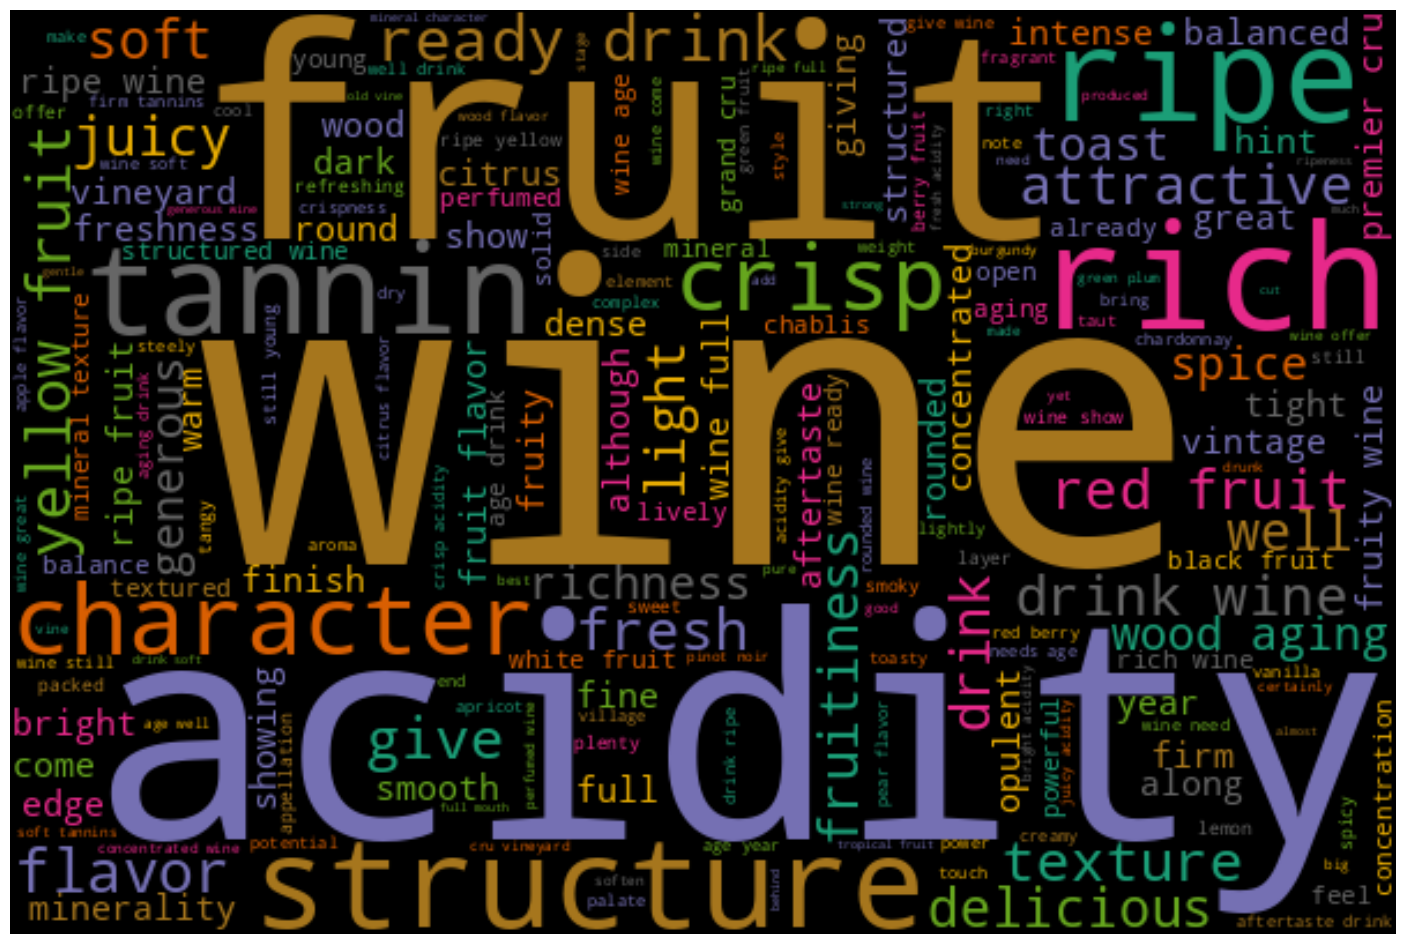

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# test wordcloud depuis la colonne description

# je dois sotcker dans une variable la serie de mon dataframe
# l'objectif ici est de pouvoir stocker tous les mots les uns à la suite des autres
# j'utilise donc cette syntaxe .str.cat(sep= ' ') ==> qui permet de concaténer toutes les valeurs d'une série en une seule grande chaine de caractere, séparée par des despaces

words = df_burgundy['wc'].str.cat(sep= ' ')  # sert à concaténer les mots et séparés par des espaces

wordcloud = WordCloud(width=600, height=400, max_words= 200, colormap='Dark2').generate(words)  # on définit la qualité du wordcloud

plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()


In [13]:
wordcloud.to_file('Wordcloud_burgundy.png')